# FAANG
FAANG refers Facebook, Apple, Amazon, Netflix and Google. These companies are considered 5 of the best tech companies in the world. In the following notebook I will import stock market data and analyze the relationship between the stocks and the S&P 500 index.

In [2]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [66]:
#Set the start and end dates we will be looking at
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2020, 4, 20)
#check the datareader is working by checking one stock only
df = web.DataReader("^GSPC", 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-14,2851.850098,2805.100098,2805.100098,2846.060059,5567400000,2846.060059
2020-04-15,2801.879883,2761.540039,2795.639893,2783.360107,5203390000,2783.360107
2020-04-16,2806.510010,2764.320068,2799.340088,2799.550049,5179990000,2799.550049
2020-04-17,2879.219971,2830.879883,2842.429932,2874.560059,5792140000,2874.560059
2020-04-20,2868.979980,2820.429932,2845.620117,2823.159912,5220160000,2823.159912


Date
2020-04-06    3068.615986
2020-04-07    3064.291685
2020-04-08    3060.851084
2020-04-09    3057.782986
2020-04-13    3054.194685
2020-04-14    3051.434985
2020-04-15    3048.066787
2020-04-16    3044.977688
2020-04-17    3042.687888
2020-04-20    3039.816587
Name: Adj Close, dtype: float64


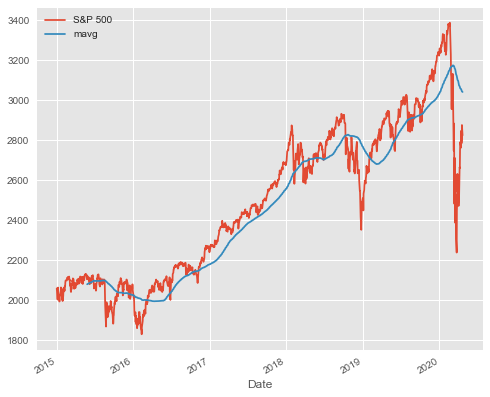

In [67]:
#calculate the moving average for the last 100 days
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()
print(mavg.tail(10))

#Moving Average makes the line smooth and showcase the increasing or decreasing trend of stocks price

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib to overlay the moving average with the adjusted closing price
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib to r's ggplot
style.use('ggplot')

close_px.plot(label='S&P 500')
mavg.plot(label='mavg')
plt.legend()

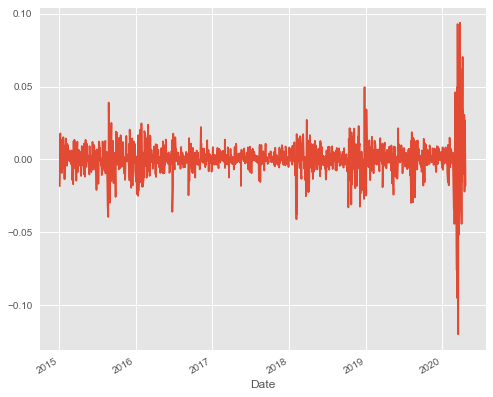

In [68]:
#Calculating the returns 
returns = close_px / close_px.shift(1) - 1
returns.plot(label='return')

In [69]:
#pulling the data for all the FAANG stocks and the S&P 500 and putting them into a single dataframe
selected = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOGL', '^GSPC']
dfFAANG = web.DataReader(selected,'yahoo',start=start,end=end)['Adj Close']
dfFAANG.tail(10)

Symbols,FB,AMZN,AAPL,NFLX,GOOGL,^GSPC
Date,,,,,,
2020-04-06,165.550003,1997.589966,262.470001,379.959991,1183.189941,2663.679932
2020-04-07,168.830002,2011.599976,259.429993,372.279999,1182.560059,2659.409912
2020-04-08,174.279999,2043.000000,266.070007,371.119995,1207.000000,2749.979980
2020-04-09,175.190002,2042.760010,267.989990,370.720001,1206.569946,2789.820068
2020-04-13,174.789993,2168.870117,273.250000,396.720001,1210.410034,2761.629883
2020-04-14,178.169998,2283.320068,287.049988,413.549988,1265.229980,2846.060059
2020-04-15,176.970001,2307.679932,284.429993,426.750000,1257.300049,2783.360107
2020-04-16,176.250000,2408.189941,286.690002,439.170013,1257.430054,2799.550049
2020-04-17,179.240005,2375.000000,282.799988,422.959991,1279.000000,2874.560059


# Daily Price
We can see in the chart below that since 2015, Amazon and Google have outperformed the other 3 stocks by quite a lot. All 5 stocks though seem to follow the trend of the S&P 500 index (labeled ^GSPC on the plot).

Text(0, 0.5, 'price in $')

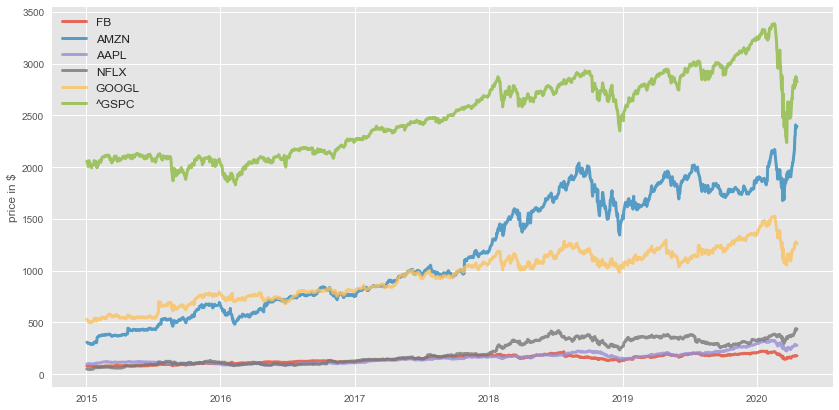

In [70]:
plt.figure(figsize=(14, 7))
for c in dfFAANG.columns.values:
    plt.plot(dfFAANG.index, dfFAANG[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

# Daily Returns
Next we calculate the daily returns for all 6 of our assets. Looking at the chart we can see that the stocks seems to follow the same trend for the polarity of the returns, but theres some differences in magnitudes. Next we can examine just how closely related they are.

Text(0, 0.5, 'daily returns')

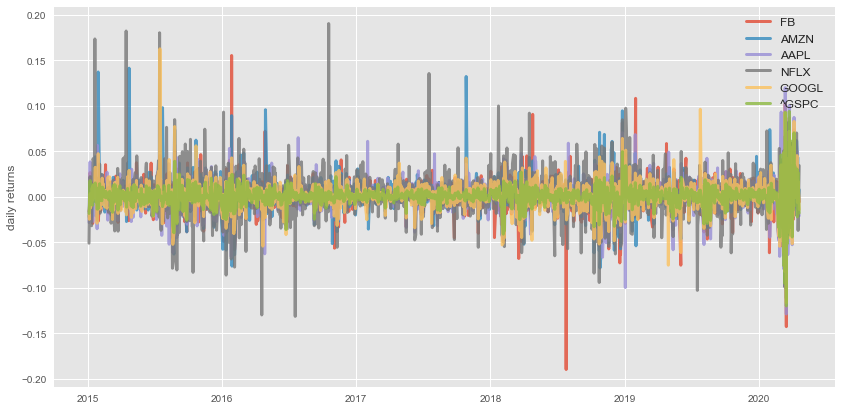

In [72]:
returnsFAANG = dfFAANG.pct_change()
plt.figure(figsize=(14, 7))
for c in returnsFAANG.columns.values:
    plt.plot(returnsFAANG.index, returnsFAANG[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

# Correlation
The table below shows us the correlation between the corresponding assets. Note the 1.0 value down the diagonal, this is because every assets has a 1:1 correlation with itself. The highest correlation of performance is Apple and the S&P 500, while the lowest is Netflix and Apple. We can create a scatterplot to visualize this data below. 

In [73]:

correlation = returnsFAANG.corr()
print(correlation)

Symbols        FB      AMZN      AAPL      NFLX     GOOGL     ^GSPC
Symbols                                                            
FB       1.000000  0.584322  0.556911  0.437570  0.671228  0.636722
AMZN     0.584322  1.000000  0.527924  0.515235  0.654273  0.578409
AAPL     0.556911  0.527924  1.000000  0.408246  0.621388  0.755086
NFLX     0.437570  0.515235  0.408246  1.000000  0.493371  0.472235
GOOGL    0.671228  0.654273  0.621388  0.493371  1.000000  0.732416
^GSPC    0.636722  0.578409  0.755086  0.472235  0.732416  1.000000


Text(0, 0.5, 'Returns AMZN')

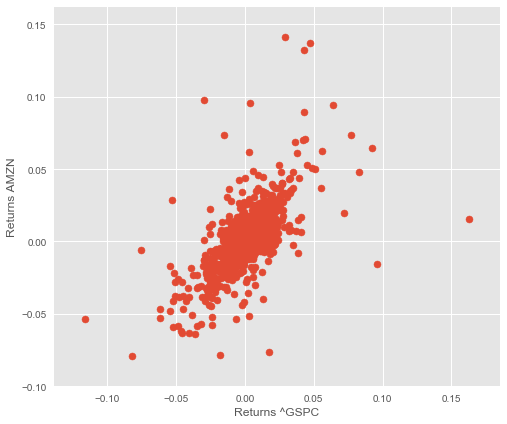

In [75]:
plt.scatter( returnsFAANG.GOOGL, returnsFAANG.AMZN)
plt.xlabel('Returns ^GSPC')
plt.ylabel('Returns AMZN')

Next we create a scatter matrix to show the correlations bewteen all the stocks.
Note that the diagonal is left blank because we do not need to plot the correlation between a stock and itself.
As we can see from a quick glance the stocks all have a positive correlation of varying degrees.


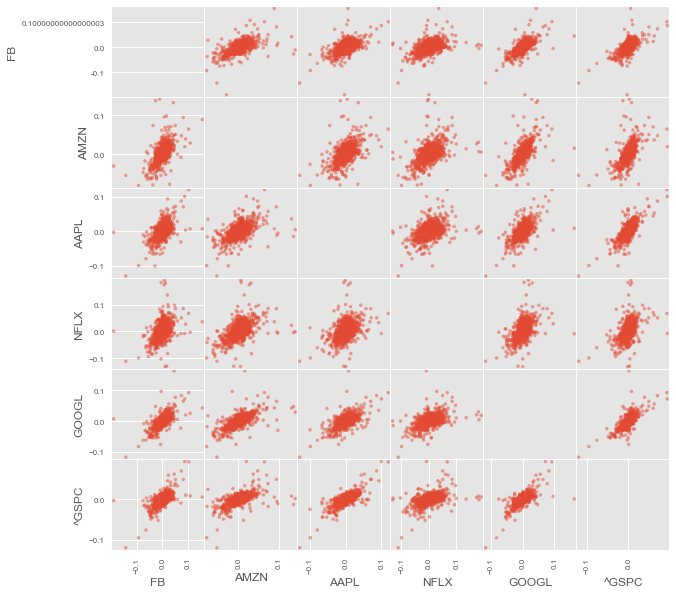

In [76]:
scatter_matrix(returnsFAANG, diagonal='', figsize=(10, 10));

The above scatter plot is nice but theres a better way to visualize this data. We can create a heatmap to make the correlations easier to see. Note that the lighter the squares are the higher the correlation is. Again the diagonal is white because a stock has a 1:1 correlation with itself. We can see below that NetFlix and Apple do not have a high correlation, and neither do NetFlix and Facebook. The chart shows us that Apple's performance is the most correlated out of all the stocks with the S&P 500 followed by Google. Netflix has the weakest correlation with the S&P 500.

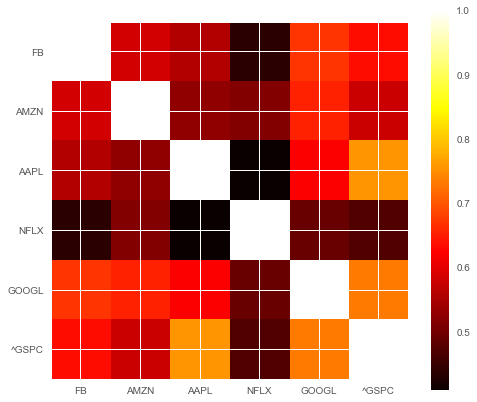

In [77]:
#Using heatmap to prove the positive correlations among the selected stock
plt.imshow(correlation, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns)
plt.yticks(range(len(correlation)), correlation.columns);

In addition to correlation, we can also analyse each stock’s risk and return. Below we calculate both the average and standard deviation of the returns for each stock and then plot them on a scatter plot. We can see that the highest risk is Netflix while also having the highest expected returns and lowest risk is the S&P 500 index while also having the lowest expected returns. 

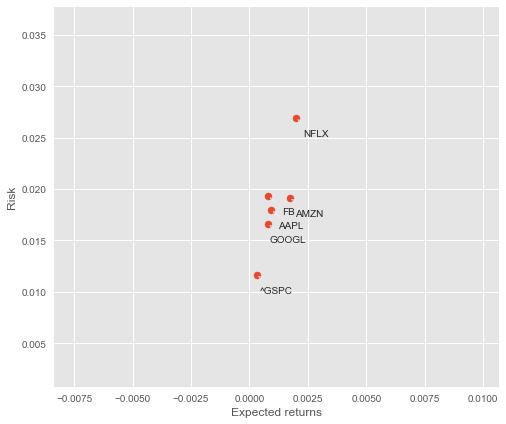

In [79]:
plt.scatter(returnsFAANG.mean(), returnsFAANG.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(returnsFAANG.columns, returnsFAANG.mean(), returnsFAANG.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'center', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Takeaways
Netflix is the riskiest investment out of all the FAANG stocks but also provides the greatest average return.  
The S&P 500 is the safest invesment but also provides the lowest average return.
All the FAANG companies have a positive correlation with the S&P 500 because they have such a huge market share.